# Chargement du dataset

In [20]:
import pandas as pd
data = pd.read_csv('Employee.csv')
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [25]:
# Statistiques descriptives
print(data.describe())

       JoiningYear  PaymentTier           Age  ExperienceInCurrentDomain  \
count  4653.000000  4653.000000  4.653000e+03               4.653000e+03   
mean   2015.062970     2.698259 -8.682216e-15              -1.053674e-16   
std       1.863377     0.561435  1.000107e+00               1.000107e+00   
min    2012.000000     1.000000 -1.532109e+00              -1.864901e+00   
25%    2013.000000     3.000000 -7.031907e-01              -5.812644e-01   
50%    2015.000000     3.000000 -2.887317e-01               6.055412e-02   
75%    2017.000000     3.000000  5.401862e-01               7.023726e-01   
max    2018.000000     3.000000  2.405251e+00               2.627828e+00   

        LeaveOrNot  Education_Masters  Education_PHD  City_New Delhi  \
count  4653.000000        4653.000000    4653.000000     4653.000000   
mean      0.343864           0.187621       0.038470        0.248657   
std       0.475047           0.390451       0.192348        0.432281   
min       0.000000         

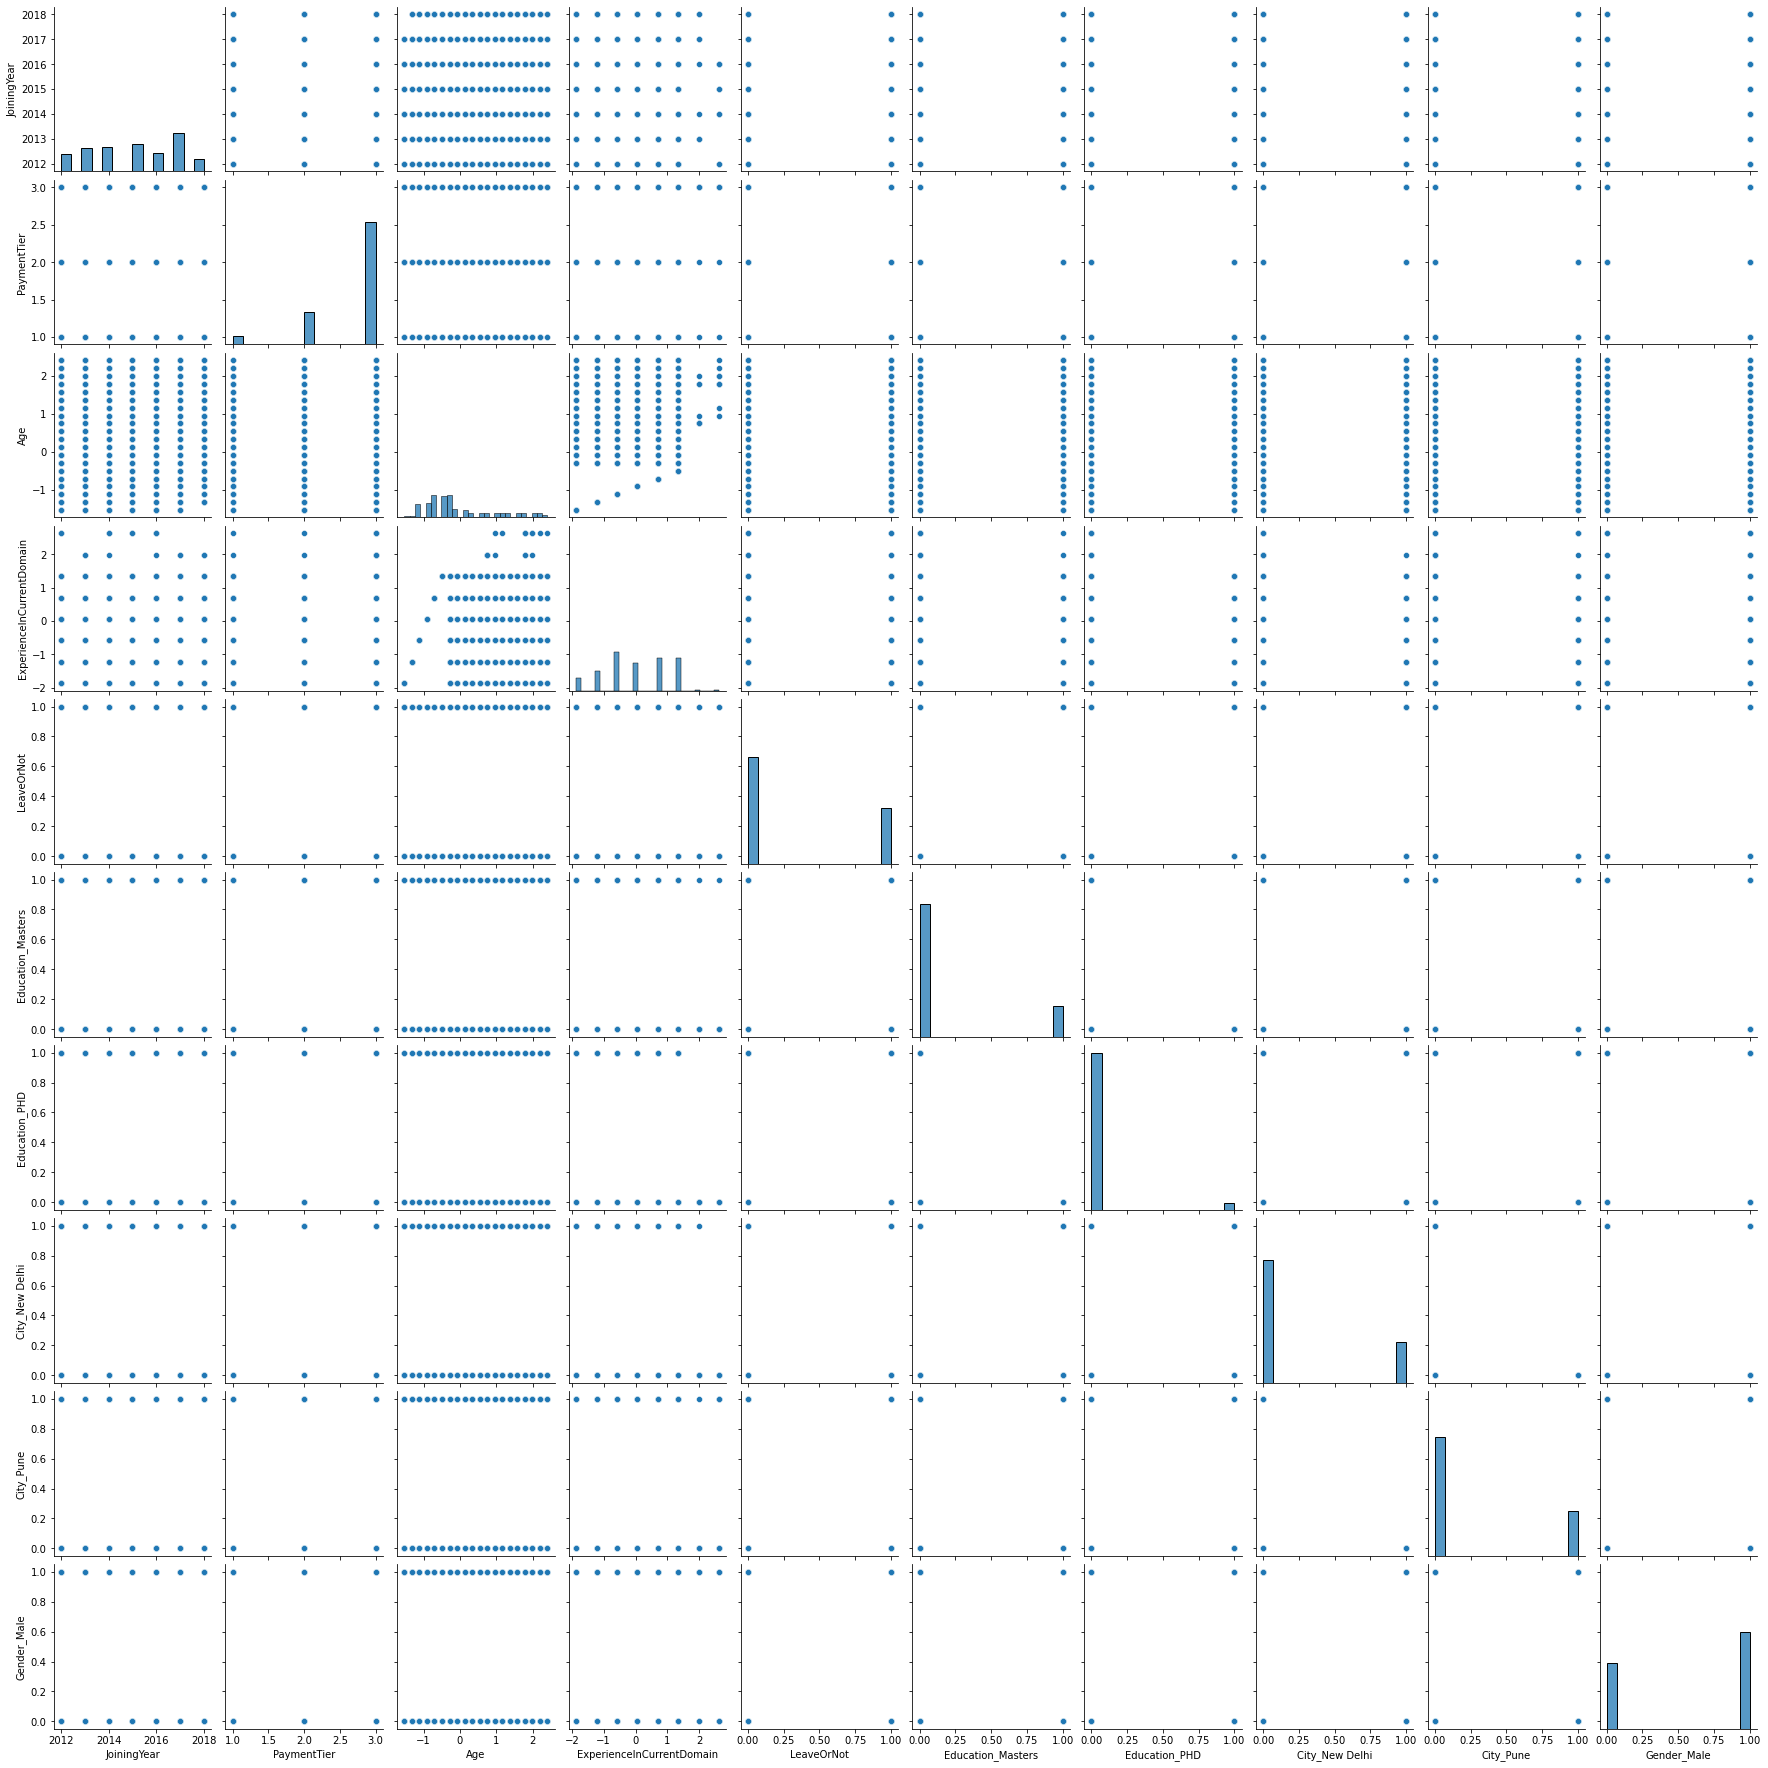

In [29]:
# Visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)
plt.show()

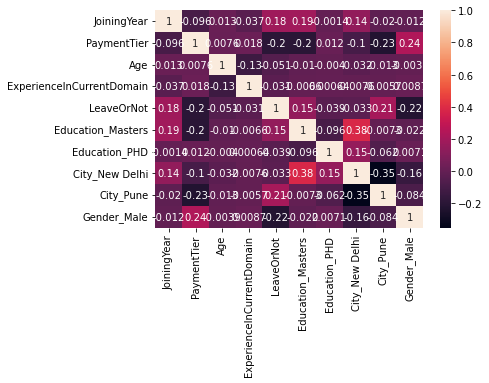

In [31]:
# Analyse des relations
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [2]:
data.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

# Pretraitement du Dataset

In [65]:
#verification de valeurs nulles
data.isnull().sum()

JoiningYear                  0
PaymentTier                  0
Age                          0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
Education_Masters            0
Education_PHD                0
City_New Delhi               0
City_Pune                    0
Gender_Male                  0
dtype: int64

In [21]:
# Encodage des variables catégorielles
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cols = pd.DataFrame(encoder.fit_transform(data[['Education', 'City', 'Gender']]), columns=encoder.get_feature_names(['Education', 'City', 'Gender']))
data.drop(['Education', 'City', 'Gender','EverBenched'], axis=1, inplace=True)
data = pd.concat([data, encoded_cols], axis=1)
data



,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male
0,2017,3,34,0,0,0.0,0.0,0.0,0.0,1.0
1,2013,1,28,3,1,0.0,0.0,0.0,1.0,0.0
2,2014,3,38,2,0,0.0,0.0,1.0,0.0,0.0
3,2016,3,27,5,1,1.0,0.0,0.0,0.0,1.0
4,2017,3,24,2,1,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
4648,2013,3,26,4,0,0.0,0.0,0.0,0.0,0.0
4649,2013,2,37,2,1,1.0,0.0,0.0,1.0,1.0
4650,2018,3,27,5,1,1.0,0.0,1.0,0.0,1.0
4651,2012,3,30,2,0,0.0,0.0,0.0,0.0,1.0


In [22]:
# Mise à l'échelle des caractéristiques numériques
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Age', 'ExperienceInCurrentDomain']] = scaler.fit_transform(data[['Age', 'ExperienceInCurrentDomain']])

In [23]:
# Analyse exploratoire des données (EDA)
# Division des données
from sklearn.model_selection import train_test_split

X = data.drop('LeaveOrNot', axis=1)
y = data['LeaveOrNot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation et entraînement des modèles

In [32]:
#modele1: regression logistique
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [33]:
#modele2: DecisionTree
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
#modele: Random forest
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

# Évaluation des algorithmes :

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Prédiction sur l'ensemble de test
logistic_regression_pred = logistic_regression_model.predict(X_test)
decision_tree_pred = decision_tree_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)

In [39]:
# Calcul des métriques
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_pred)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)

logistic_regression_precision = precision_score(y_test, logistic_regression_pred)
decision_tree_precision = precision_score(y_test, decision_tree_pred)
random_forest_precision = precision_score(y_test, random_forest_pred)
print("la precision du modele regression lineaire",logistic_regression_precision)
print("la precision du modele Arbre de decision",decision_tree_precision)
print("la precision du modele de foret d'arbre de decision",random_forest_precision)

la precision du modele regression lineaire 0.7106598984771574
la precision du modele Arbre de decision 0.7728813559322034
la precision du modele de foret d'arbre de decision 0.823321554770318


# Comparaison avec une autre approche :

In [54]:
from sklearn.svm import SVC
# Initialisation et entraînement du modèle SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [55]:
# Prédiction sur l'ensemble de test
svm_pred = svm_model.predict(X_test)

In [61]:
# Calcul des métriques pour le modèle SVM
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1_score = f1_score(y_test, svm_pred)

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
# Comparaison avec les autres modèles
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("SVM Accuracy:", svm_accuracy)

Logistic Regression Accuracy: 0.7443609022556391
Decision Tree Accuracy: 0.8281417830290011
Random Forest Accuracy: 0.8517722878625135
SVM Accuracy: 0.6552094522019334


# conclusion: